C:\Users\WILL2749\AppData\Local\anaconda3new\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Model Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Dense (Dense)                 │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

---------------------

Starting CNN Training...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 33ms/step - accuracy: 0.9537 - loss: 0.1598 - val_accuracy: 0.9855 - val_loss: 0.0495
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9841 - loss: 0.0534 - val_accuracy: 0.9870 - val_loss: 0.0415
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 32ms/step - accuracy: 0.9872 - loss: 0.0398 - val_accuracy: 0.9877 - val_loss: 0.0410
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9898 - loss: 0.0314 - val_accuracy: 0.9883 - val_loss: 0.0428
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 36ms/step - accuracy: 0.9922 - loss: 0.0247 - val_accuracy: 0.9905 - val_loss: 0.0366

CNN Training Complete.


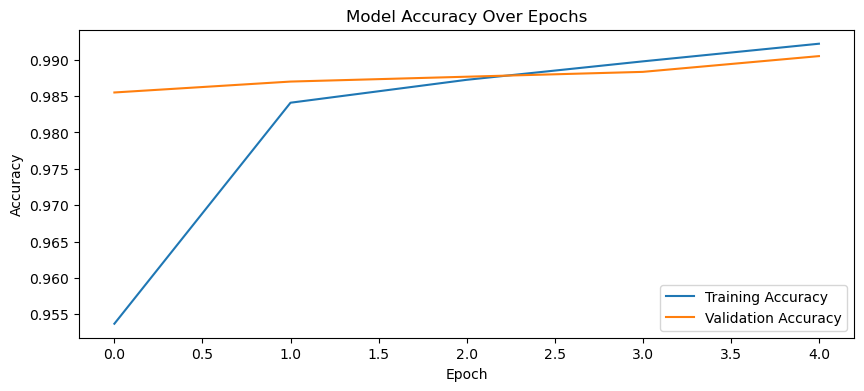

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#  1. Data Import and Preprocessing 
# Import data and organize it
try:
    data = pd.read_csv("C:/Users/WILL2749/Downloads/mnist_train.csv")
except FileNotFoundError:
    print("Error: File not found. Please update the path to 'mnist_train.csv'.")
    # Using a placeholder for demonstration if the file isn't found
    raise

# Separate labels (first column) and pixel data (rest)
labels = np.array(data.iloc[:, 0])
x_train_raw = np.array(data.iloc[:, 1:])

# Normalize pixel data to be between 0 and 1
x_train = x_train_raw / 255.0

#  2. Data Reshaping for CNN and One-Hot Encoding 

# MNIST images are 28x28 grayscale, so the shape must be (num_samples, 28, 28, 1)
image_size = 28
num_channels = 1
x_train = x_train.reshape(-1, image_size, image_size, num_channels)

# Convert integer labels to one-hot encoded vectors (e.g., 7 -> [0,0,0,0,0,0,0,1,0,0])
num_classes = 10
y_train = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

#  3. Build the Three-Layer CNN Model 

# A standard, simple CNN architecture with three core layer blocks:
# Convolutional Layer 1 + Pooling
# Convolutional Layer 2 + Pooling
# Flatten + Dense (Output) Layer

model = Sequential([
    # Layer 1: Convolution
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, num_channels), name='Conv1'),
    MaxPooling2D((2, 2), name='Pool1'),

    # Layer 2: Convolution
    Conv2D(64, (3, 3), activation='relu', name='Conv2'),
    MaxPooling2D((2, 2), name='Pool2'),

    # Layer 3: Classification (DNN part)
    Flatten(name='Flatten'),
    Dense(num_classes, activation='softmax', name='Output_Dense') # Softmax for multi-class classification
])

#  4. Compile and Train the Model 

# Compile the model: Define the loss function, optimizer, and metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Appropriate loss for multi-class problems
              metrics=['accuracy'])

# Display the model summary (showing the three layers and parameter count)
print("\n--- Model Summary ---")
model.summary()
print("---------------------\n")

# Train the model
print("Starting CNN Training...")
history = model.fit(
    x_train, y_train,
    epochs=5,       # Number of passes over the entire dataset
    batch_size=32,  # Number of samples per gradient update
    validation_split=0.1 # Hold out 10% of data for validation
)

print("\nCNN Training Complete.")

# --- 6. Plot Training History (Optional) ---
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()